# Report - Correlation between air pollution and number of vehicles with combustion motors in Nordrhein-Westfalen.

**Joaquin Ayzanoa** <br>
**10th Jan 2024**

## Preparation

### Install Dependencies

In [1]:
%pip install numpy==1.24.2
%pip install pandas==1.5.3
%pip install pytest==7.4.0
%pip install SQLAlchemy==1.4.46
%pip install openpyxl==3.0.10
%pip install matplotlib==3.7.0
%pip install scipy==1.11.4

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Modules

In [2]:
import os
import pandas as pd
import numpy as np
import subprocess
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Load Data

In [3]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists("../data/vehicles.sqlite"):
    subprocess.run(["python", "../project/pipeline.py"])
    
if not os.path.exists("../data/airpollution.sqlite"):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from databases
con1 = create_engine('sqlite:///../data/vehicles.sqlite')
df1 = pd.read_sql_table('vehicles', con1)

con2 = create_engine('sqlite:///../data/airpollution.sqlite')
df2 = pd.read_sql_table('airpollution', con2)



### Prepare Data

In [4]:
# Prepare regions' name of df1, needed for analysis
df1 = df1[df1['PC'].str.len()==4]
df1['Province'] = df1['Province'].astype(str) + ', '
df1['Province'] = df1['Province'].str.split(',', expand = True,n=1)[0]
df1['Province'] = df1['Province'].str.replace('Kreis','')
df1['Province'] = df1['Province'].str.replace('Rhein','')
df1['Province'] = df1['Province'].str.replace('-','')
df1['Province'] = df1['Province'].str.replace(' ','')
df1.drop_duplicates(subset=['Province'], inplace=True, keep = False)

# Prepare regions' name of df2, needed for analysis
df2['Name'] = df2['Name'].str.replace('-',' ')
df2['Name'] = df2['Name'].str.split(' ', expand = True,n=1)[0]

In [5]:
# Add additional values to dataframe, needed for analysis
df1['Combustion vehicles'] = df1['Cars'] + df1['Trucks'] + df1['Tractors'] + df1['Motorcycles']

# Create additional dataframes needed for analysis per contaminant
# Average by region
df2_NO2 = df2[df2['NO2 anual average µg/m³'].notna()].copy()
df2_NO2 = df2_NO2.groupby(['Name'])['NO2 anual average µg/m³'].mean().reset_index()

df2_PM10 = df2[df2['PM10 anual average µg/m³'].notna()].copy()
df2_PM10 = df2_PM10.groupby(['Name'])['PM10 anual average µg/m³'].mean().reset_index()

df2_PM2 = df2[df2['PM2,5 anual average µg/m³'].notna()].copy()
df2_PM2 = df2_PM2.groupby(['Name'])['PM2,5 anual average µg/m³'].mean().reset_index()

## Introduction

This analysis seeks to find an answer to the question of whether the number of combustion engine vehicles is the main factor of air pollution in North Rhine-Westfalen. This analysis also helps identify areas with a greater number of vehicles, which could potentially indicate a greater demand for services related to mechanical workshops and gasoline consumption. The resulting information may be relevant in a study that evaluates the number of vehicles a city can afford to have because high pollution can cause a high rate of respiratory diseases, the latter issue is not addressed in this analysis.

## Methods

### Datasources
The datasources used in this analysis is described bellow:

* **Datasource1:** Stock of motor vehicles by vehicle type in Nordrhein-Westfalen
    * Link: https://www.landesdatenbank.nrw.de/ldbnrwws/downloader/00/tables/46251-02iz_00.csv
    * Data Type: CSV
    * Provides: Stock of motor vehicles by motor vehicle by region in Nordrhein-Westfalen of the year 2022
<br><br>
* **Datasource2:** Annual parameters of air pollutants in Nordrhein-Westfalen
    * Link: https://www.opengeodata.nrw.de/produkte/umwelt_klima/luftqualitaet/luqs/eu_jahreskenngroessen/LUQS-EU-Kenngroessen-2022.xlsx
    * Data Type: xlsx
    * Provides: Annual parameters of air pollutants in Nordrhein-Westfalen for 2022: Nitrogen dioxide (NO2), fine dust (PM10), fine dust (PM2.5)

    
### How was the data pipeline built?

Datasourse1 is a csv file and the information extraction process was as follows:
<br>
1. The csv was read through the pandas library using 'pandas.read_csv'. Since it was not necessary to read all the rows of the file, the 'skiprows' and 'nrows' parameters were added with which you can read from a row 'x' to a row 'y'.
<br><br>
2. Then, the dataframe column names were renamed to easily understandable ones.
<br><br>
3. Next, the missing information that has been represented as '-' in the csv file was removed
<br><br>
4. Finally, A sql database was created with the designated database name using 'sql.create_engine', the variable types of each column were set, and the table was saved with the designated name.

<br><br>
Datasourse2 is a xlsx file and the information extraction process was as follows:
<br>
1. The xlsx file was captured through the pandas library using 'pandas.ExcelFile(url). Then, the sheet ('EU-Jahreskenngrößen 2022') of the xlsx book, where the table you want to read is located, was selected. Subsequently, the rows and columns of interest in the dataframe were selected.
<br><br>
2. Then, the dataframe column names were renamed to easily understandable ones.
<br><br>
3. Next, The strings '-', '--', 'nan' were replaced with np.nan value.
<br><br>
4. Finally, A sql database was created with the designated database name using 'sql.create_engine', the variable types of each column were set, and the table was saved with the designated name.

## Results

### Distribution of vehicles

First let's have a look at how is the amount of vehicles distributed in the regions.

What is a Histogram Chart?
A histogram is a statistical graph that represents the distribution of a dataset through plotted bars, each representing a particular category or class interval. The bar height reflects the frequency or count of data points within each group. In essence, histograms reveal patterns, trends, and insights hidden within unordered, raw data - exhibiting an organized picture that makes interpretation and analysis much more manageable and effective.



<Axes: ylabel='Frequency'>

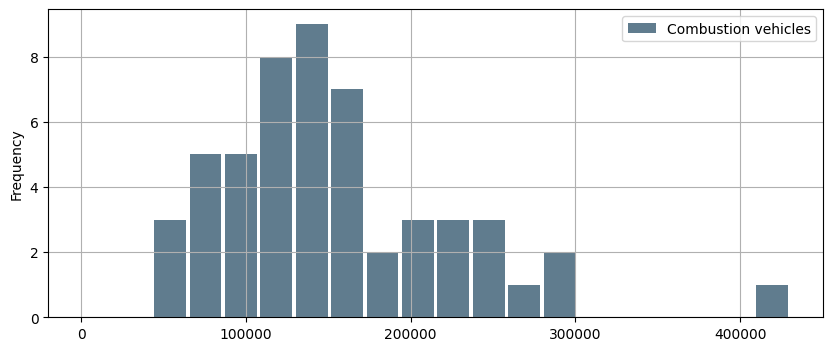

In [6]:
# Plot histogram of total number of vehicles
df1.plot.hist(grid=True, column=['Combustion vehicles'], 
                   bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 4))

<Axes: ylabel='Frequency'>

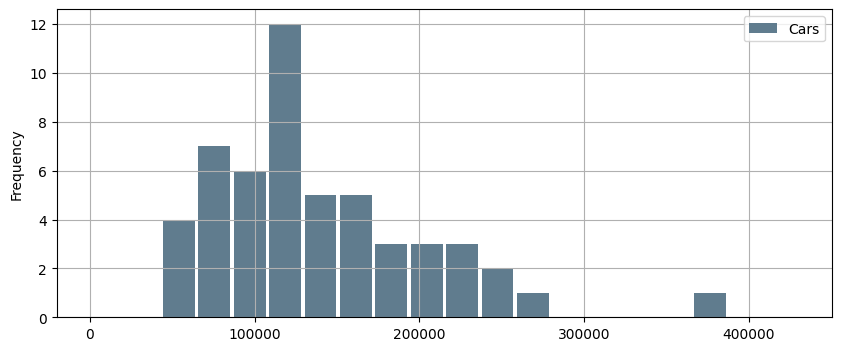

In [7]:
# Plot histogram of total number of Cars
df1.plot.hist(grid=True, column=['Cars'], 
                   bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 4))

<Axes: ylabel='Frequency'>

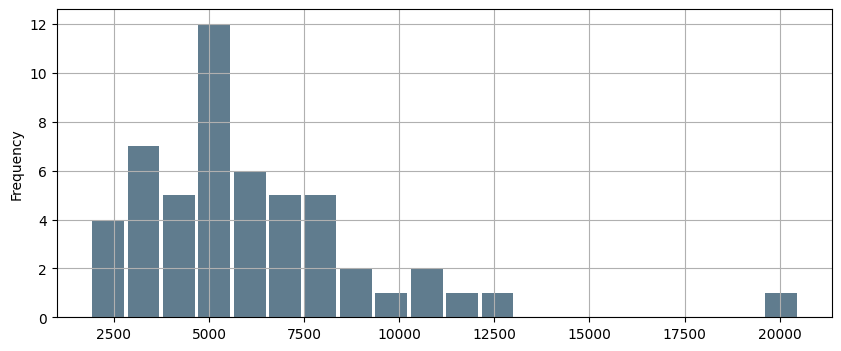

In [8]:
# Plot histogram of total number of Trucks
df1['Trucks'].plot.hist(grid=True,bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 4))

<Axes: ylabel='Frequency'>

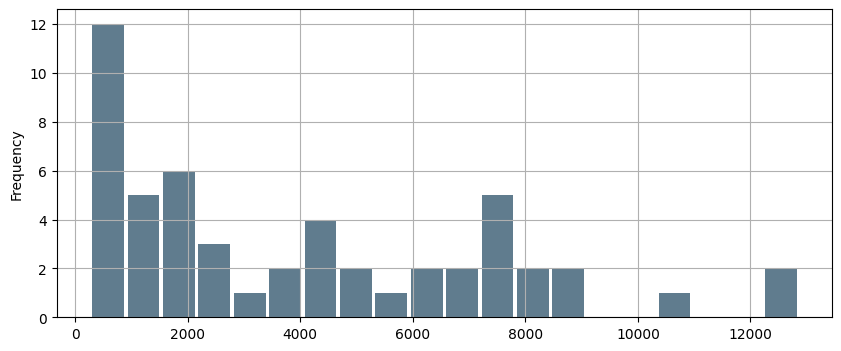

In [9]:
# Plot histogram of total number of Tractors
df1['Tractors'].plot.hist(grid=True, 
                   bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 4))

<Axes: ylabel='Frequency'>

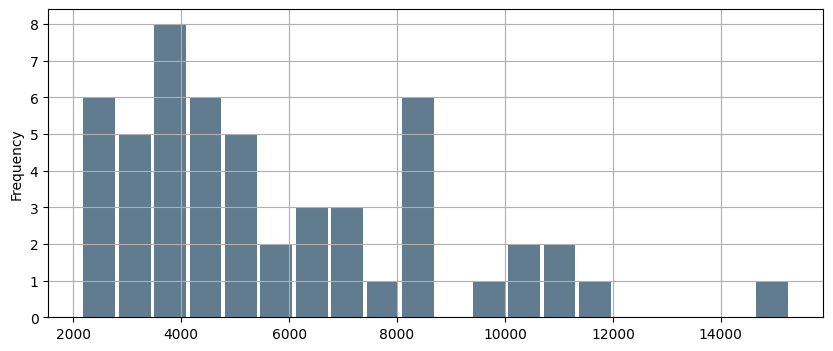

In [10]:
# Plot histogram of total number of Motorcycles
df1['Motorcycles'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(10, 4))

### Box Plots

What is a boxplot?
A boxplot is a standardized way of displaying the distribution of data based on its five-number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). Boxplots can tell you about your outliers and their values, if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

<Axes: >

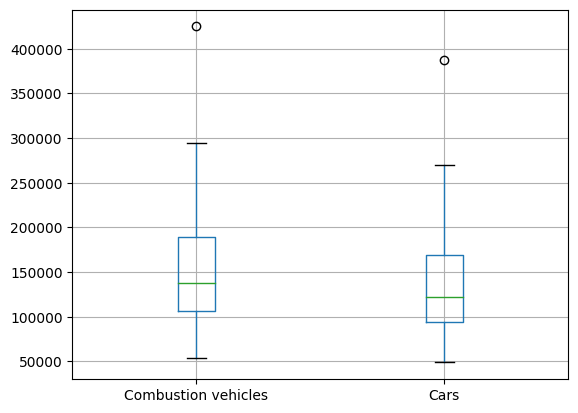

In [11]:
#Box plot of 'Combustion Vehicles' and 'Cars'
df1[['Combustion vehicles', 'Cars']].boxplot()

<Axes: >

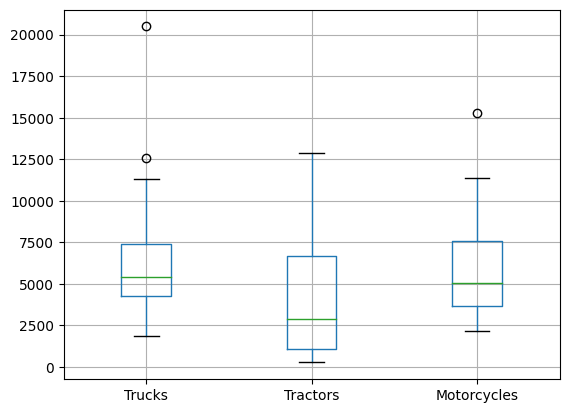

In [12]:
#Box plot of 'Trucks', 'Tractors', 'Motorcycles'
df1[['Trucks', 'Tractors','Motorcycles']].boxplot()

### Distribution of pollutants in the air

Now let's have a look at how is the NO2, PM10, PM2.5 distributed in the regions.

<Axes: ylabel='Frequency'>

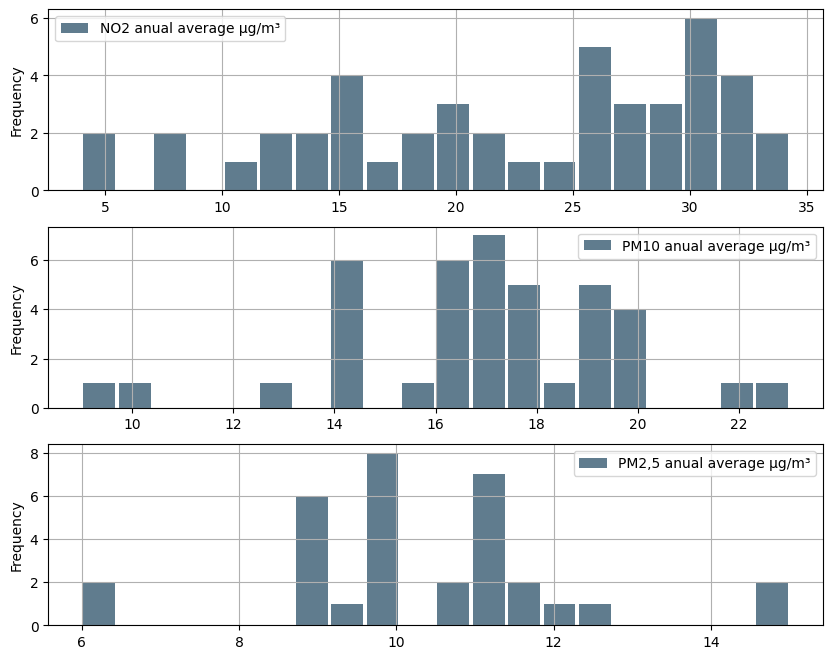

In [13]:
# Plot histogram of Airpollution data
fig, axs = plt.subplots(3)
df2_NO2.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', figsize=(10, 8), ax = axs[0])
df2_PM10.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', figsize=(10, 8), ax = axs[1])
df2_PM2.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', figsize=(10, 8), ax = axs[2])

### Boxplots

<Axes: >

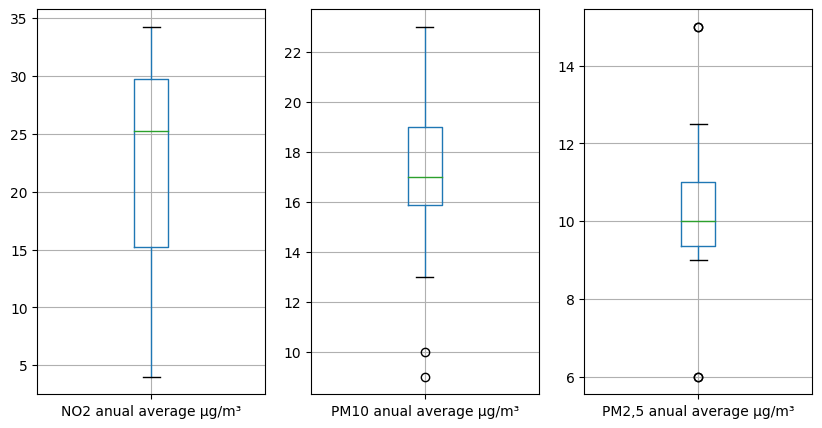

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
df2_NO2.boxplot(ax = axs[0])
df2_PM10.boxplot(ax = axs[1])
df2_PM2.boxplot(ax = axs[2])

### Correlation matriz of vehicles and pollutants in the air

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [18]:
df1_v = df1[['Province', 'Combustion vehicles']]
df1_v.columns = ['Name', 'Combustion vehicles']

df2_NO2_v = pd.merge(df2_NO2, df1_v, on='Name', how='inner')
df2_PM10_v = pd.merge(df2_PM10, df1_v, on='Name', how='inner')
df2_PM2_v = pd.merge(df2_PM2, df1_v, on='Name', how='inner')

df3 = pd.merge(df1_v, df2_NO2, on='Name', how='inner')
df3 = pd.merge(df3, df2_PM10, on='Name', how='inner')
df3 = pd.merge(df3, df2_PM2, on='Name', how='inner')

df3.sort_values(by= 'Combustion vehicles', ascending=False, inplace=True)
df3.reset_index(inplace=True, drop=True)
df3

,Name,Combustion vehicles,NO2 anual average µg/m³,PM10 anual average µg/m³,"PM2,5 anual average µg/m³"
0,Köln,424905,29.420141,16.250000,9.666667
1,Düsseldorf,281750,31.156448,19.500000,11.500000
2,Essen,278826,30.416916,19.750000,11.333333
3,Dortmund,257024,31.990829,17.000000,11.000000
4,Wesel,225436,14.000000,19.000000,10.000000
5,Duisburg,222805,27.526293,19.250000,15.000000
6,Wuppertal,169927,26.500000,18.000000,10.000000
7,Borken,150948,12.000000,16.000000,10.000000
8,Bielefeld,148291,23.066361,16.000000,10.500000
9,Soest,137478,8.000000,14.000000,10.000000


In [19]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\joaqu\AppData\Local\Temp\ipykernel_75328\2437435075.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


,Combustion vehicles,NO2 anual average µg/m³,PM10 anual average µg/m³,"PM2,5 anual average µg/m³"
Combustion vehicles,1.000000,0.243302,0.241226,-0.012554
NO2 anual average µg/m³,0.243302,1.000000,0.416301,0.328342
PM10 anual average µg/m³,0.241226,0.416301,1.000000,0.647095
"PM2,5 anual average µg/m³",-0.012554,0.328342,0.647095,1.000000


### Look for linear aproximations (Number of Vehicles vs Pollutans)

Linear approximation is a method we can use to approximate the value of a function at a particular point. The reason liner approximation is useful is because it can be difficult to find the value of a function at a particular point.

Slope: 5.9433231177881956 Constant: 23.032450266923455


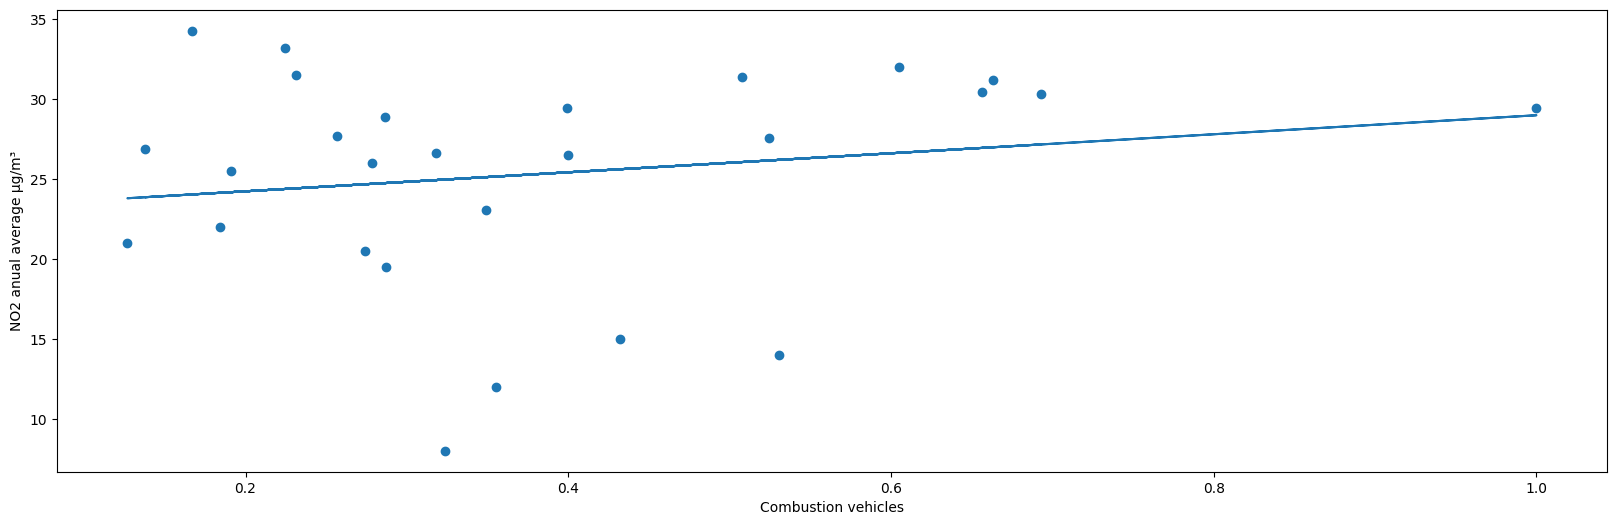

In [20]:
#For NO2
x=df2_NO2_v['Combustion vehicles']
x = x / max(x) #Scale values for better understanding
y=df2_NO2_v['NO2 anual average µg/m³']
plt.figure(figsize=(20,6))
plt.xlabel('Combustion vehicles')
plt.ylabel('NO2 anual average µg/m³')
plt.scatter(x,y)

# We can basically make a linear regression fit and visualize the positive trend.
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
print("Slope:",m,"Constant:",b)

Slope: 2.110364583565986 Constant: 16.450023169003916


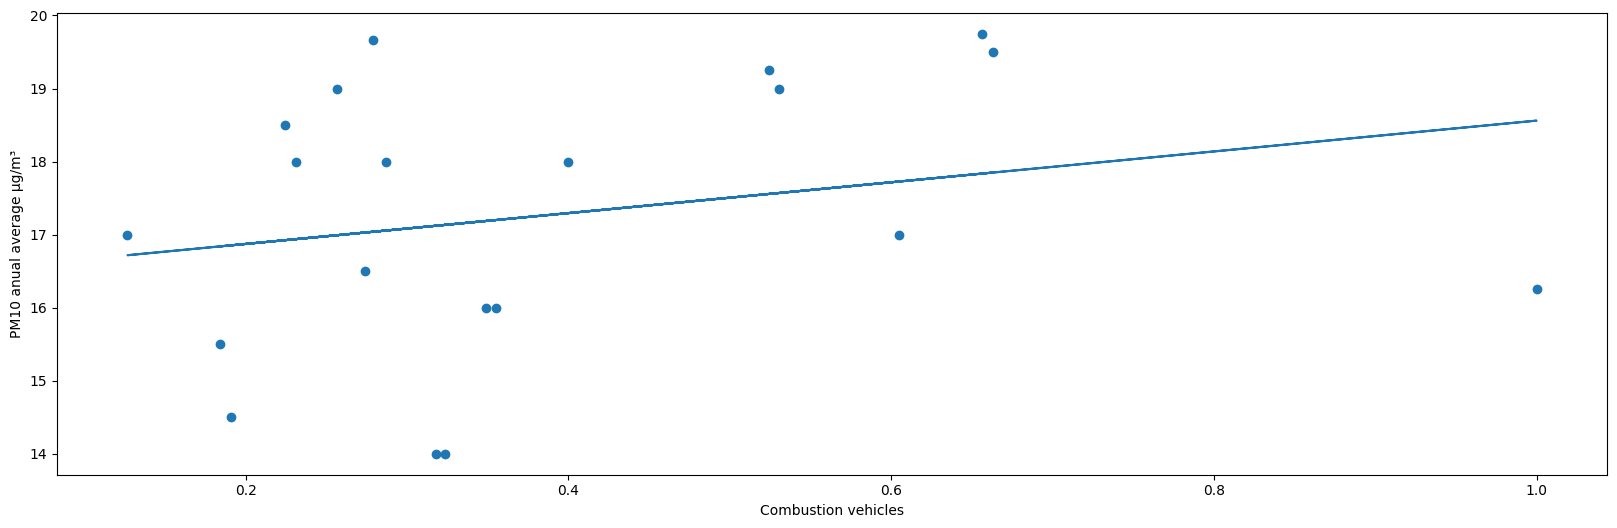

In [21]:
#For PM10
x=df2_PM10_v['Combustion vehicles']
y=df2_PM10_v['PM10 anual average µg/m³']
x = x / max(x) #Scale values for better understanding
plt.figure(figsize=(20,6))
plt.xlabel('Combustion vehicles')
plt.ylabel('PM10 anual average µg/m³')
plt.scatter(x,y)

# We can basically make a linear regression fit and visualize the positive trend.
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
print("Slope:",m,"Constant:",b)

Slope: -0.09863320695338808 Constant: 10.98986872588154


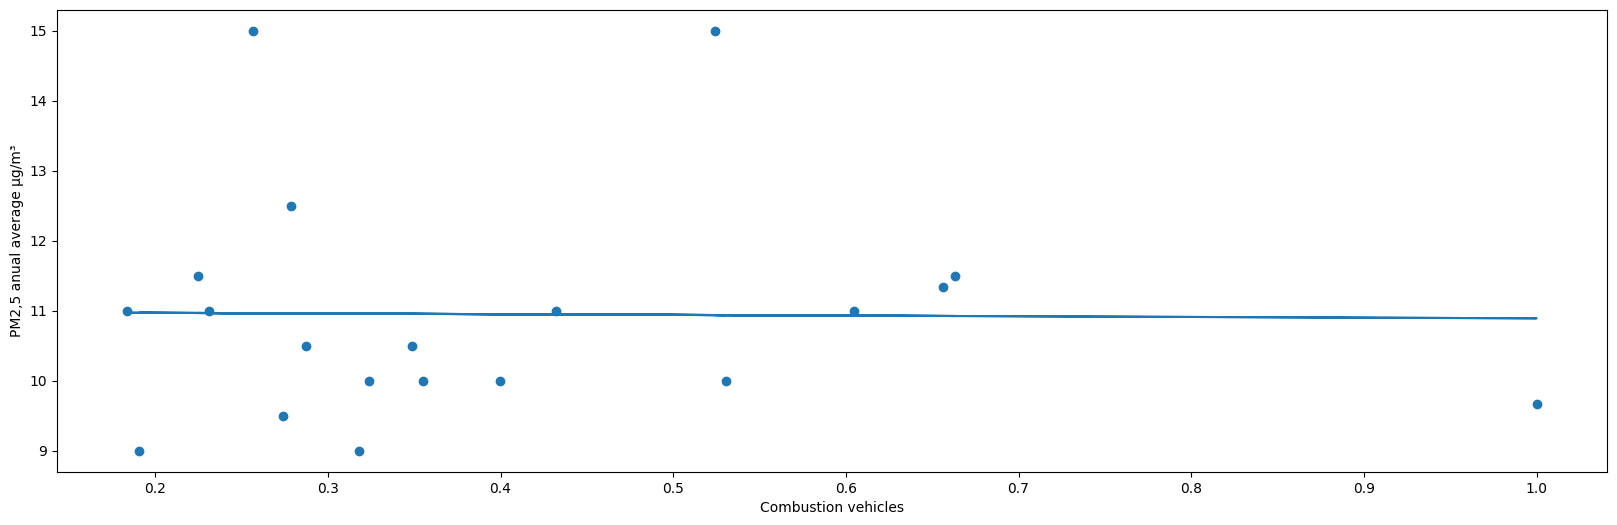

In [22]:
#For PM2.5
x=df2_PM2_v['Combustion vehicles']
y=df2_PM2_v['PM2,5 anual average µg/m³']
x = x / max(x) #Scale values for better understanding
plt.figure(figsize=(20,6))
plt.xlabel('Combustion vehicles')
plt.ylabel('PM2,5 anual average µg/m³')
plt.scatter(x,y)

# We can basically make a linear regression fit and visualize the positive trend.
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
print("Slope:",m,"Constant:",b)

## Conclusion

1. The analysis show that there is a weak correlation between NO2 pollutant and the quantity of combustion vehicles acording to the correlation matrix, a weak linear aproximation could be possible just to see how the amount of combustion vehicles if affecting the quantity of NO2 pollutant in the air. This correlation between this variables is positive, which means that the more quantity of combustion vehicles, the more of NO2 pollutant in the air. The case of PM10 is similar to the case of NO2.

2. The analysis show that there is no correlation between PM2.5 pollutant and the quantity of combustion vehicles acording to the correlation matrix, the slope of the linear aproximation is almost zero, which means there is no correlation between variables.

3. Pollutants PM10 an PM2.5 has strong correlation.

4. Köln is the region with most quantity of combustion vehicles, but the region with most NO2 pollutant is Oberhausen, the region with more PM10 pollutant is Essen and the region with more PM2.5 pollutant is Duisburg and Krefeld.

## Discussion for the future

1. The amount of data should be greater, not all the region has sensors' data of the air pollutants.

2. It would be great for a future analysis to compare with data of 2023 and 2024, in order to see how air pollutants change versus the change of quantity of combustion vehicles. Also, we can check if the adoption of electric mobility is impacting positively in the air quality of the cities.